In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
print(f'Shape of X_train: {X_train.shape} and shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape} and shape of y_test: {y_test.shape}')

Shape of X_train: (60000, 28, 28) and shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,) and shape of y_test: (10000,)


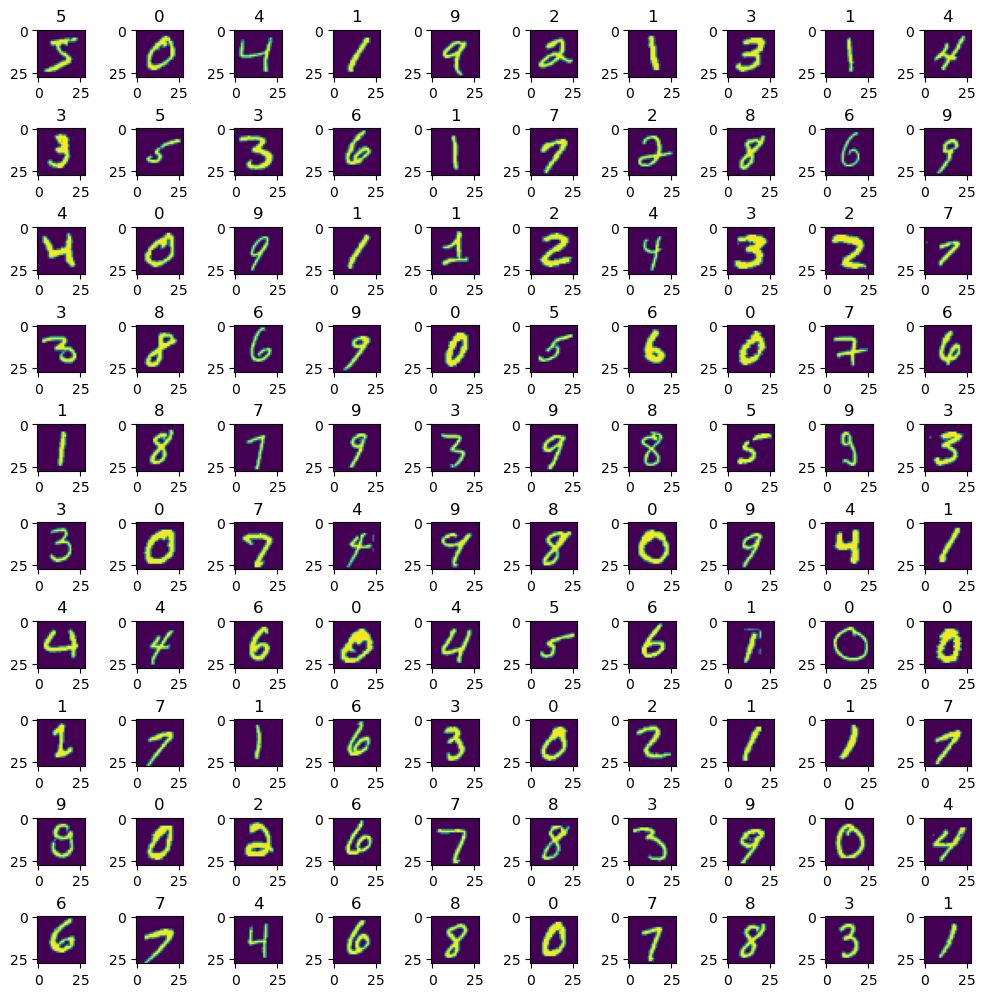

In [4]:
fig,axes=plt.subplots(10,10,figsize=(10,10))
fig.tight_layout()
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])

In [5]:
maxi = X_train.max()
mini = X_train.min()
X_train_scaled = X_train/(maxi-mini)

In [58]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=250,activation='relu'),
    Dense(units=200,activation='relu'),
    Dense(units=200,activation='relu'),
    Dense(units=10,activation='linear')
])

In [59]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 250)               196250    
                                                                 
 dense_41 (Dense)            (None, 200)               50200     
                                                                 
 dense_42 (Dense)            (None, 200)               40200     
                                                                 
 dense_43 (Dense)            (None, 10)                2010      
                                                                 
Total params: 288,660
Trainable params: 288,660
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [61]:
model.fit(X_train_scaled.reshape(-1,784), y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2043 - accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0913 - accuracy: 0.9716
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0651 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0506 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0419 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0342 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0305 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0267 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0243 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - lo

In [62]:
X_test_scaled=X_test/(maxi-mini)
loss,accuracy = model.evaluate(X_test_scaled.reshape(-1,784),y_test)
print(f'loss of the model: {loss}')
print(f'Accuracy of the model: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0844 - accuracy: 0.9820
loss of the model: 0.08439319580793381
Accuracy of the model: 0.9819999933242798


1/1 [==============================] - 0s 39ms/step


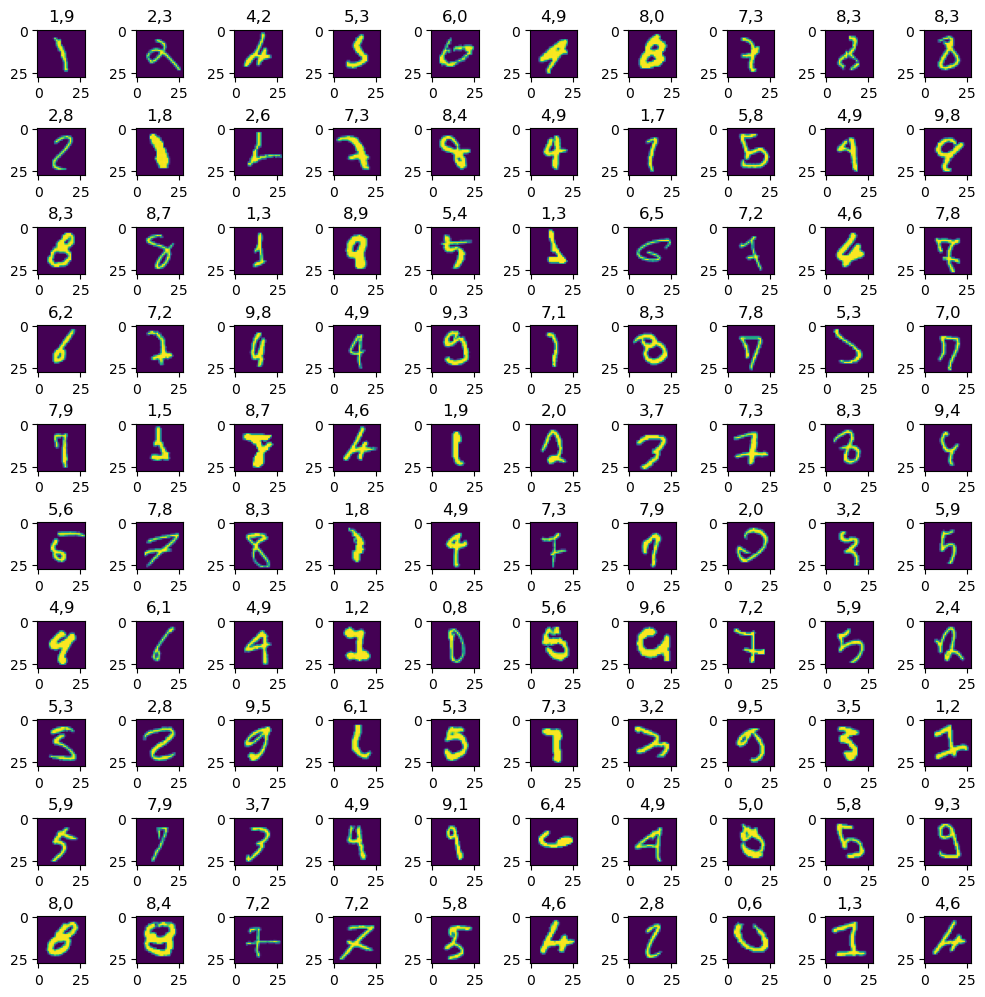

In [63]:
wrong = (np.argmax(model.predict(X_test_scaled.reshape(-1,784)),axis=1)!=y_test)

wrong_predict=X_test_scaled[wrong]
label=y_test[wrong]
fig,axes=plt.subplots(10,10,figsize=(10,10))
fig.tight_layout()
for i,ax in enumerate(axes.flat):
    ax.imshow(wrong_predict[i]*255)
    ax.set_title(str(label[i])+','+str(np.argmax(model.predict(wrong_predict[i].reshape(-1,784)),axis=1)[0]))